# Customer Segmentaiton Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(
)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Data Visulization and EDA

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

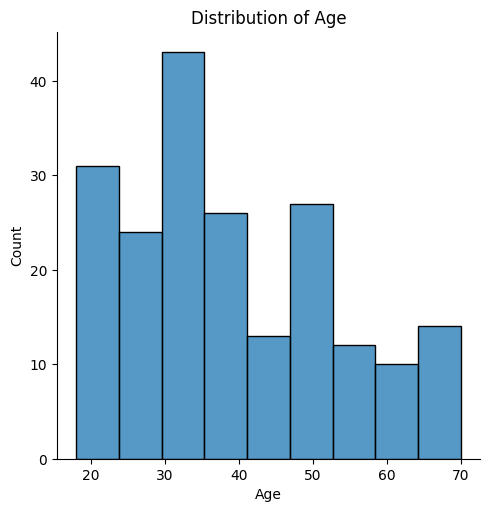

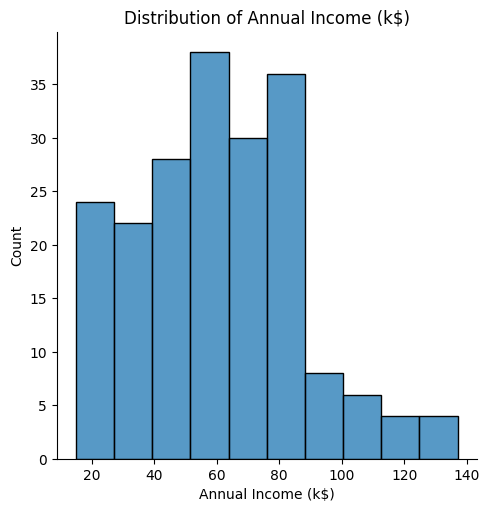

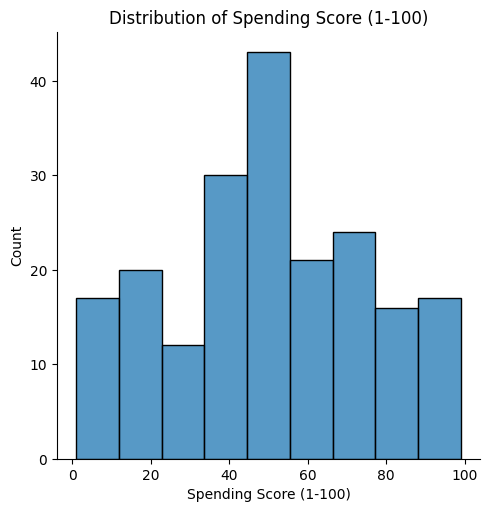

In [9]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numeric_cols:
    sns.displot(df[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')

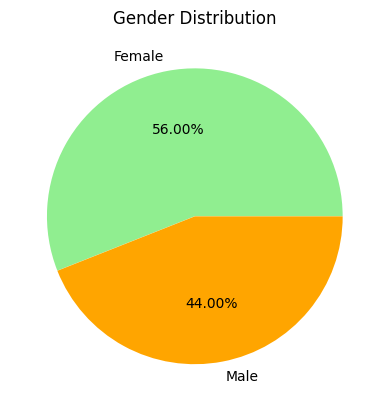

In [10]:
data = df.groupby('Gender').size()

data.plot(kind='pie', subplots=True,
          colors = ['lightgreen', 'orange'],
          explode = [0, 0.001],
          labels = ['Female', 'Male'],
          autopct = '%.2f%%')
plt.title('Gender Distribution')
plt.ylabel("")
plt.show()

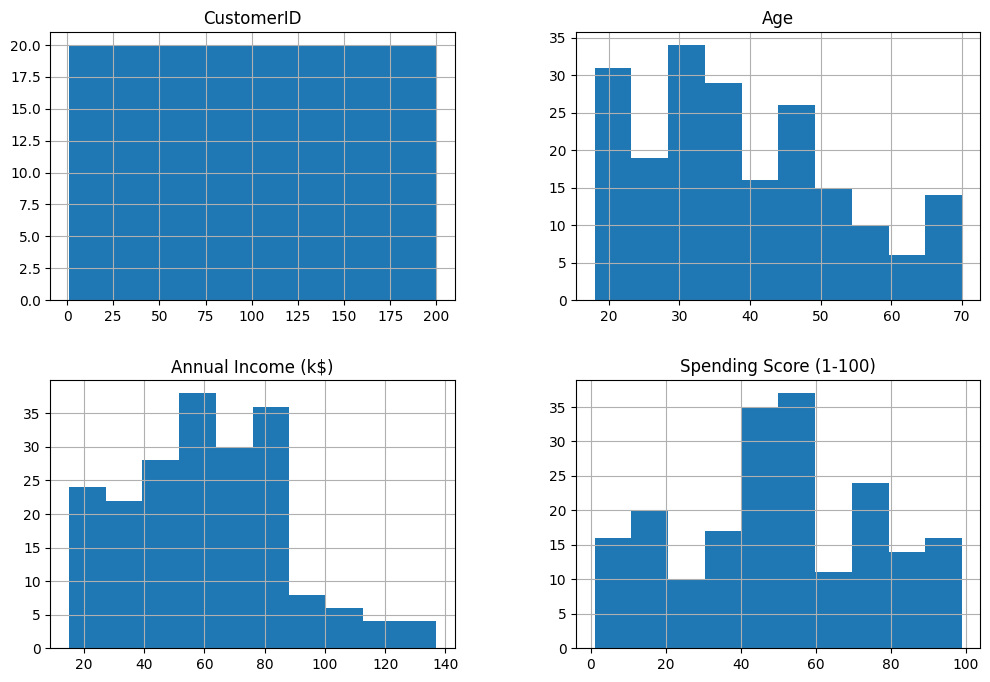

In [11]:
df.hist(figsize=(12, 8))
plt.show()

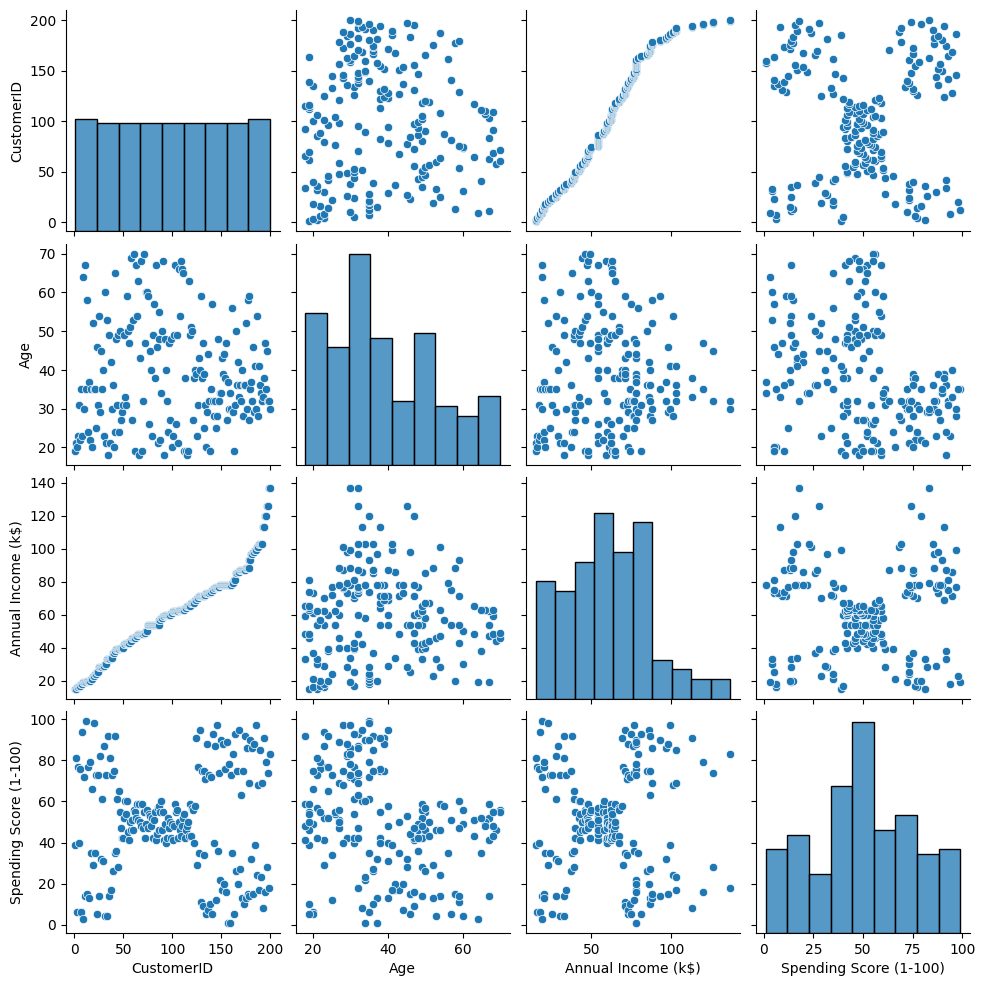

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

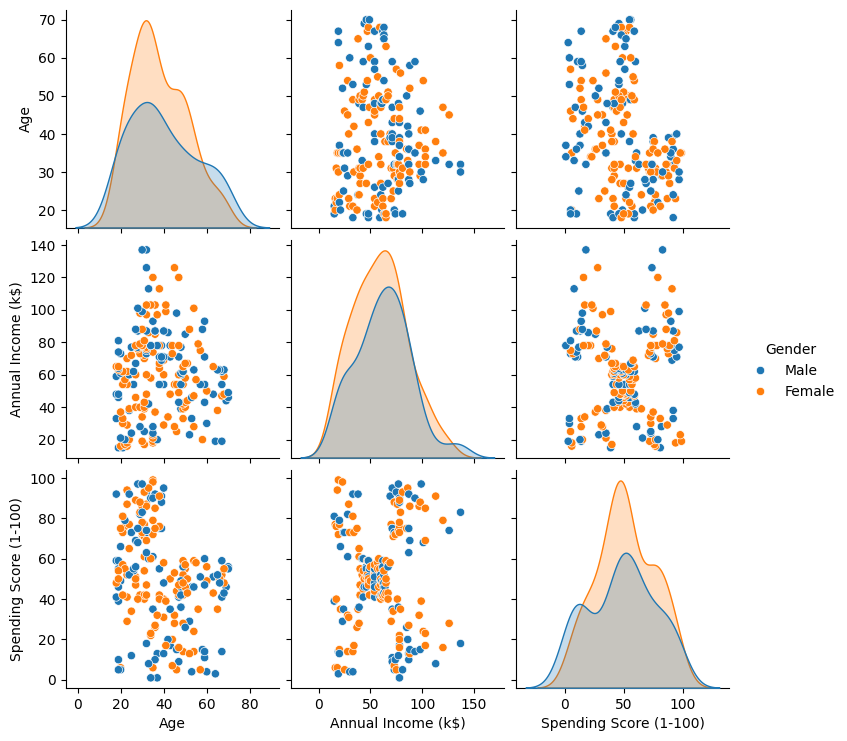

In [14]:
sns.pairplot(data=df, vars= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.show()

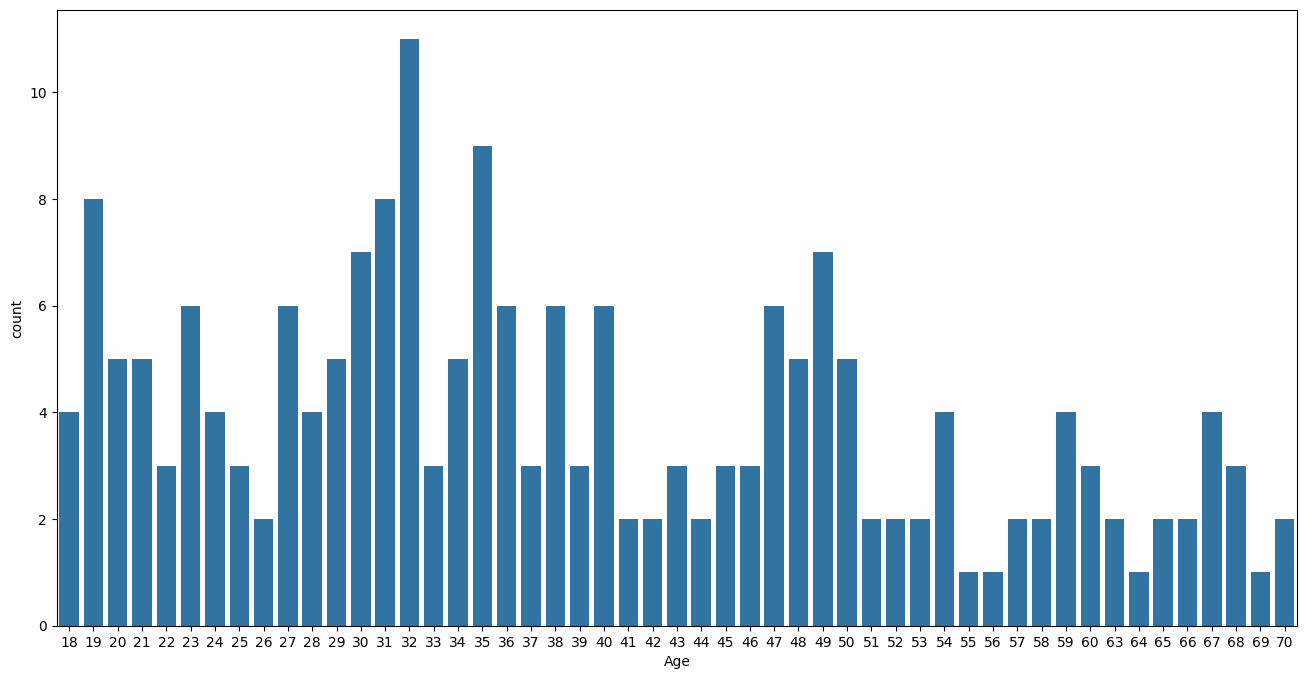

In [15]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Age', data=df)
plt.show()

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

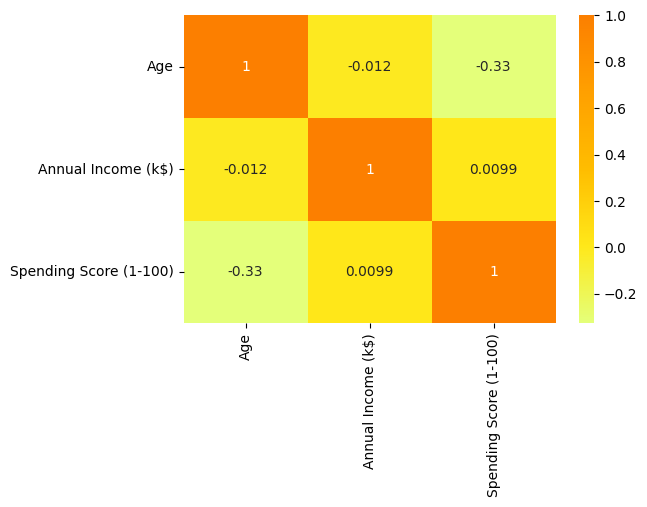

In [17]:
corr_df = df.drop(columns=['Gender', 'CustomerID'], axis=1)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df.corr(), cmap='Wistia', annot=True)
plt.show()

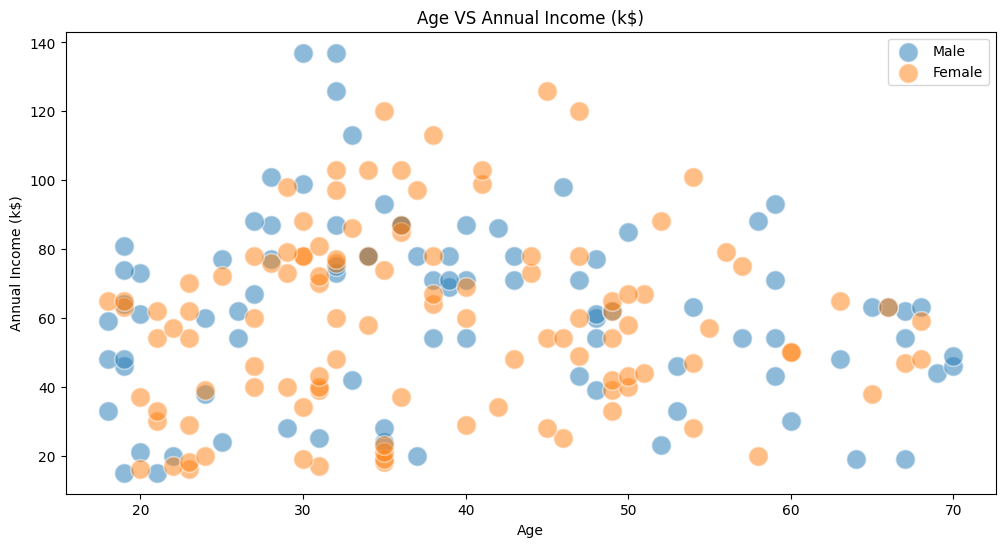

In [18]:
plt.figure(figsize=(12, 6))
for gender in ['Male', 'Female']:
    sns.scatterplot(x='Age', y='Annual Income (k$)',
                    data = df[df['Gender']==gender],
                    s = 200, alpha = 0.5,
                    label = gender)
plt.title('Age VS Annual Income (k$)')
plt.show()

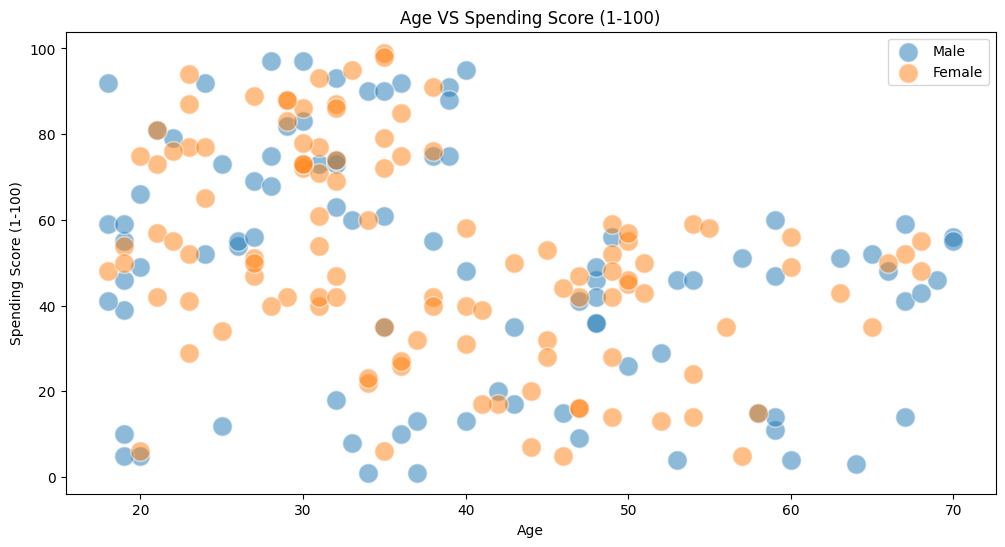

In [19]:
plt.figure(figsize=(12, 6))
for gender in ['Male', 'Female']:
    sns.scatterplot(x='Age', y='Spending Score (1-100)',
                    data = df[df['Gender']==gender],
                    s = 200, alpha = 0.5,
                    label = gender)
plt.title('Age VS Spending Score (1-100)')
plt.show()

### K-Means Clustering

In [20]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
X = df.iloc[:, [3, 4]].values

In [22]:
X 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [23]:
from sklearn.cluster import KMeans

In [24]:
k = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(X)
    k.append(Kmeans.inertia_)

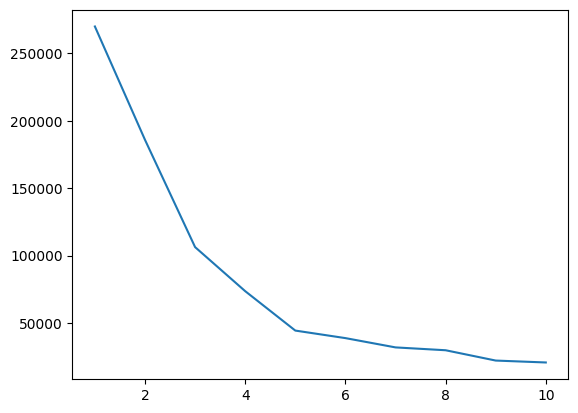

In [25]:
plt.plot(range(1, 11), k)
plt.show()

In [26]:
model = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = model.fit_predict(X)

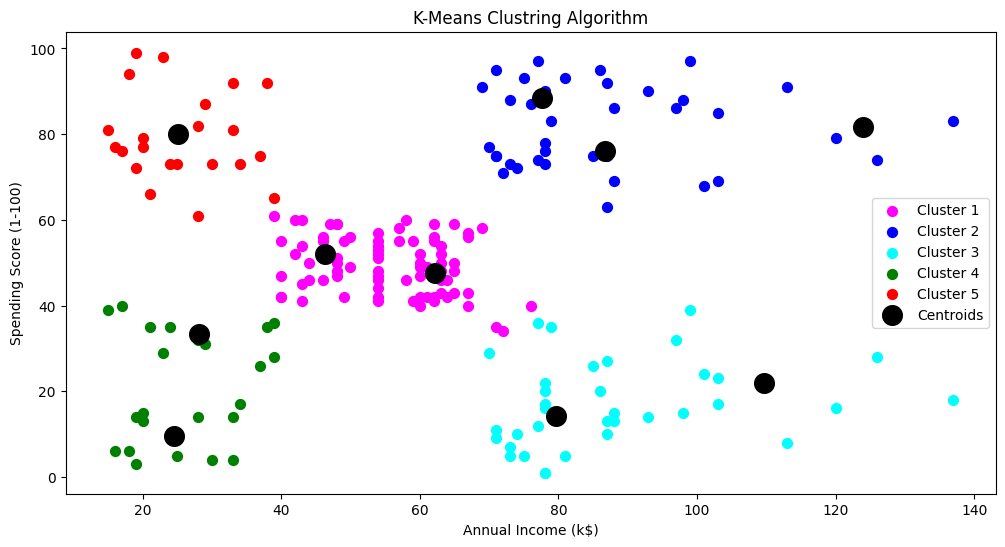

In [33]:
plt.figure(1, figsize=(12, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='magenta', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='cyan', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='green', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='red', label='Cluster 5')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('K-Means Clustring Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()